# BRITISH AIRWAYS
## A Predictive Modeling of Customer Bookings

#### Task Description: 
Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

### Step 1: Understanding and Analyzing the Dataset

In [1]:
import pandas as pd

In [25]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [26]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

We can notice here the absence of null values, which helps us in our analysis.

In [27]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [28]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

In [30]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [31]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Now that we have a statistical summary of our data, we can move to visualizing a few characteristics of our data.

In [32]:
import matplotlib.pyplot as plt

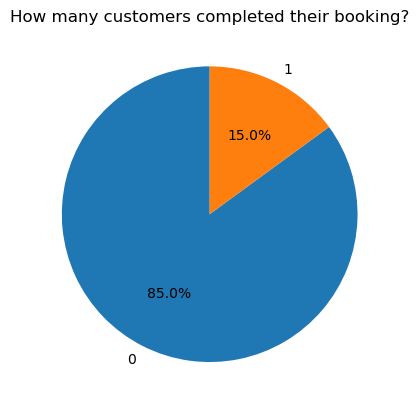

In [105]:
fig, ax = plt.subplots()
y=df['booking_complete'].value_counts()
ax.pie(y, labels=y.index, autopct='%1.1f%%', startangle=90)

# Add title
ax.set_title('How many customers completed their booking?')

# Show chart
plt.show()

We can clearly see that among all the customers of the dataset, only 15% have completed their booking.

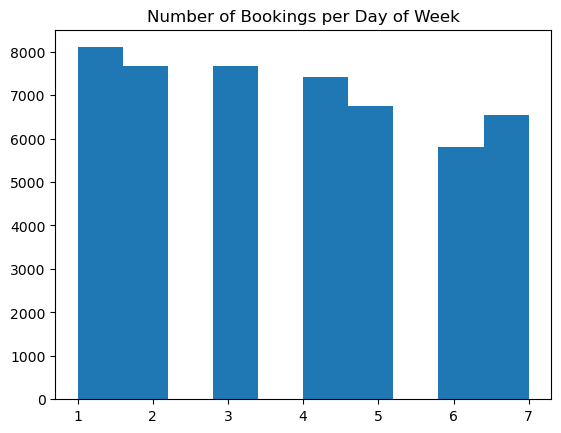

In [39]:
plt.hist(df['flight_day'])
 
plt.title("Number of Bookings per Day of Week")
plt.show()

The histogram shows that the day people travel on the most is Monday, while they tend to travel less on Saturday. However, the numbers are quite close, so there is no absolute preference for a specific day of the week to travel.

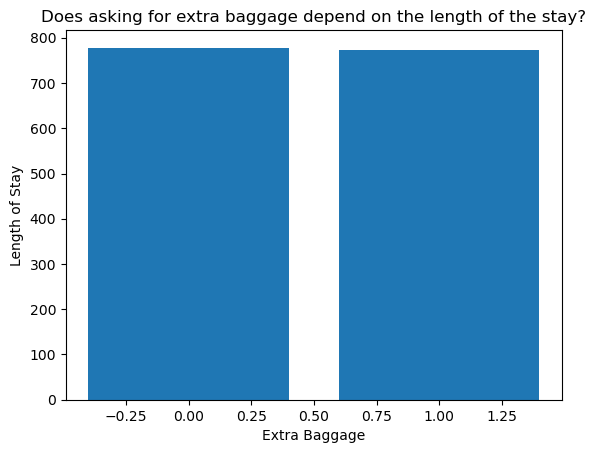

In [68]:
plt.bar(df['wants_extra_baggage'], df['length_of_stay'])
plt.title("Does asking for extra baggage depend on the length of the stay?")
 
plt.xlabel('Extra Baggage')
plt.ylabel('Length of Stay')
 
plt.show()
 
plt.show()

This bar chart shows us that customers asking for extra baggage does not depend on the length of stay, as we have similar lengths of stay for both customers who asked for extra baggage and those who did not.

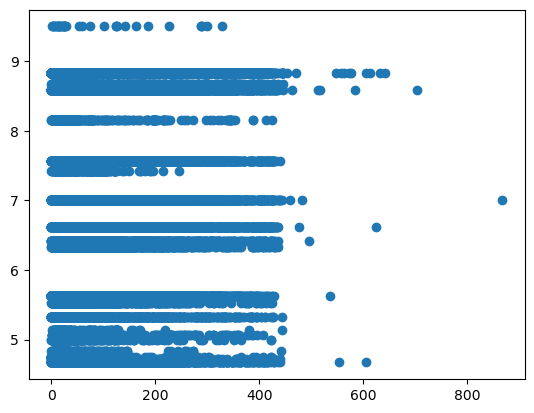

In [44]:
x=df["purchase_lead"]
y=df["flight_duration"]
plt.scatter(x,y)
plt.show()

Through this scatter plot, we can see that the longest purchase leads, ie. duration between the booking and flight dates are recorded for seven-and-nine-hour flights. However, there is no general rule that states that the longer the flight, the higher the purchase lead since most people seem to book their tickets 0 to 400 days before most of their flights.

In [42]:
import seaborn as sns

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


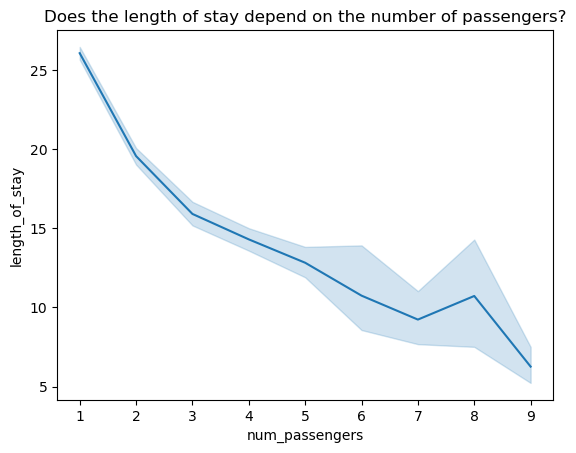

In [66]:
x=df["num_passengers"]
y=df["length_of_stay"]
sns.lineplot(x, y, data=df)
 
# setting the title using Matplotlib
plt.title('Does the length of stay depend on the number of passengers?')
 
plt.show()

We can see that there is a negative correlation between the length of stay and the number of passengers in the same booking operation. This shows us that the less the people going on a trip together, the longer the stay will be. The highest stay duration can be observed for one single passenger travelling alone, who would book a 26-day stay in average.

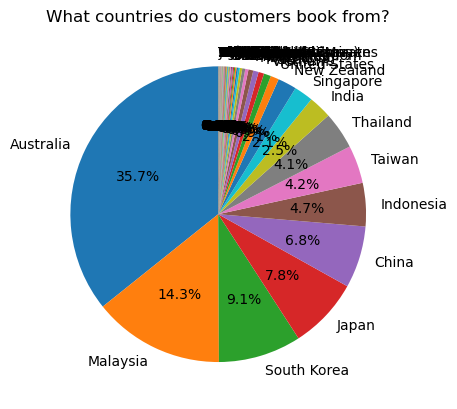

In [77]:
fig, ax = plt.subplots()
y=df['booking_origin'].value_counts()
ax.pie(y, labels=y.index, autopct='%1.1f%%', startangle=90)

# Add title
ax.set_title('What countries do customers book from?')

# Show chart
plt.show()

The pie chart shows us the booking origins of the customers. In fact, 35.7% of British Airways customers are from Australia, and Malaysians are close seconds, while only 8% of the customers come from countries that are not stated in the graph above.

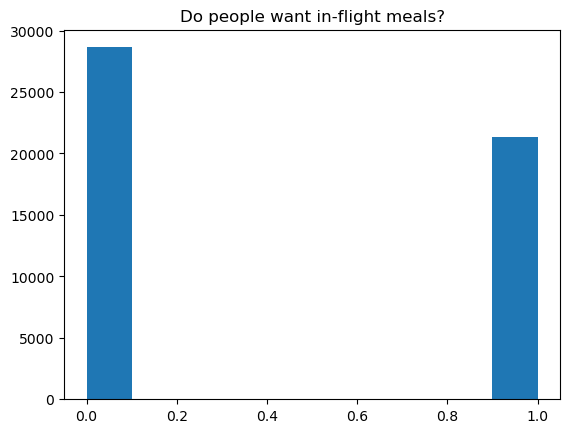

In [63]:
plt.hist(df['wants_in_flight_meals'])
 
plt.title("Do people want in-flight meals?")
 
plt.show()

This last histogram shows that almost 60% of British Airways customers do no look for in-flight meals when booking their trips.

The above visuals have given us some information about the booking behavior of customers as well as valuable insights about the British Airways market. 
Now, in order for the company to remain proactive and to maintain its position in the aviation industry, we need to build a predictive model of customers bookings.

### Step 2: Predicting the Customers Bookings

In [96]:
#Data Processing
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [97]:
le = LabelEncoder()
col_list = df.select_dtypes(include = "object").columns
for colsn in col_list:
    df[colsn] = le.fit_transform(df[colsn].astype(str))
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Create a Random Forest classifier with default hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 85.05%


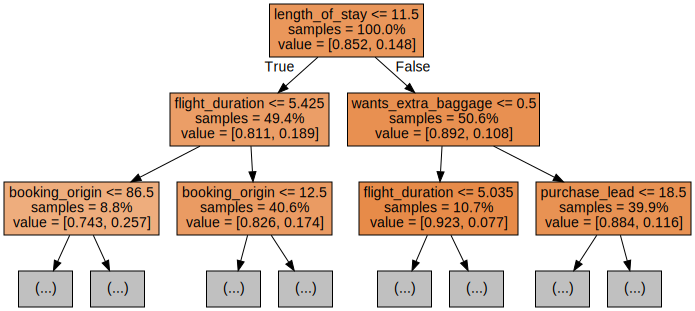

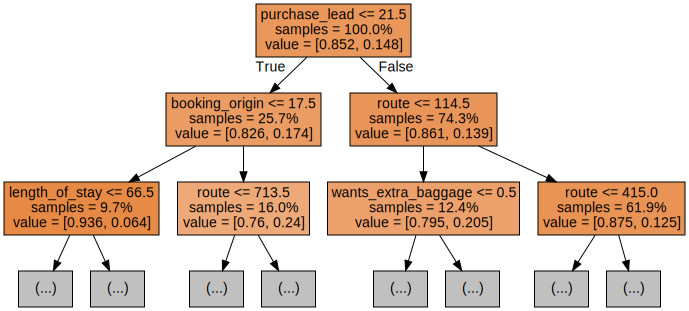

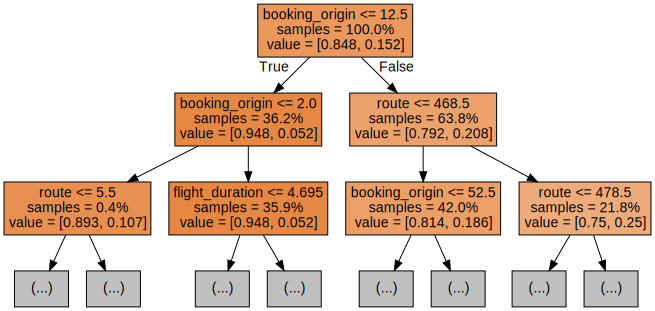

In [98]:
# Exporting the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [99]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001EC2E9DA1C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001EC2E2DC880>})

In [100]:
#Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 399}


In [101]:
le = LabelEncoder()
col_list = df.select_dtypes(include = "object").columns
for colsn in col_list:
    df[colsn] = le.fit_transform(df[colsn].astype(str))
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Create a Random Forest classifier with default hyperparameters
rf = RandomForestClassifier(n_estimators=399, max_depth=15, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 85.11%


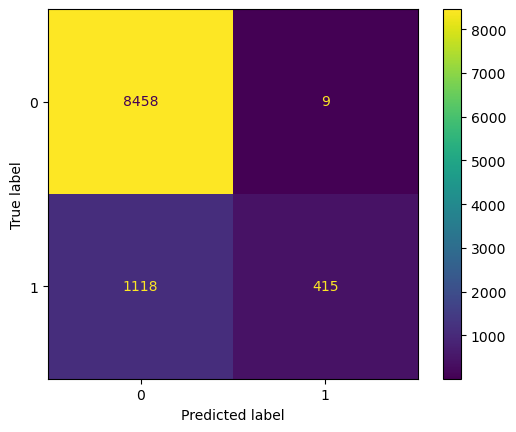

In [102]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

This prediction model, based on the random forest algorithm, has a 85.11% accuracy rate.
The initial accuracy rate of the model was 85.05%, but after conducting the hyperparameters tuning, it increased by 0.06% . <br>
We can see through the confusion matrix that: <br>
The amount of true positive labels is 8458, and we have 415 true negatives, therefore yielding 8873 correct labels. <br>
However, 1127 results were falsely labeled.

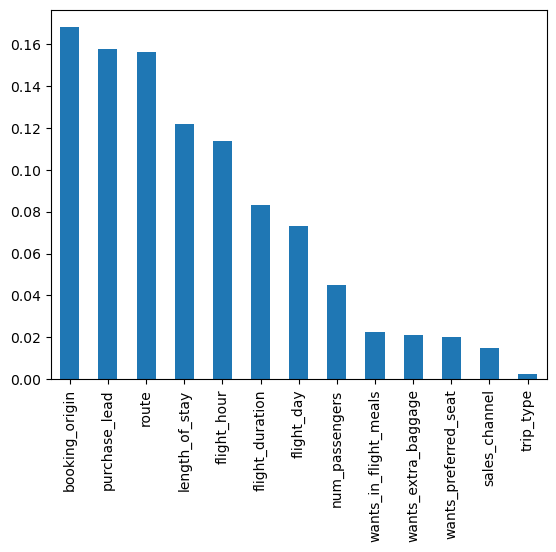

In [103]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

This histogram shows us the importance of each feature, using the model’s internal score, in finding the best way to split the data within each decision tree.
We can see that the features that are influencing the prediction the most are: the booking origin, the purchase lead, the route, and the length of stay.



## Conclusion: 
This model has a good accuracy rate in the prediction of customer bookings for British Airways. <br>
In fact, the company can be 85.11% sure of the accuracy of its predictions when using this model. <br>
The only problem mainly lies in the false negative labels that this algorithm gives, so BA should be ready for more bookings than the predicted number. <br>
Since the booking origin is the biggest contributor in predicting the booking behavior of the customers, British Airways should also pay a close attention to its customers from Australia, Malaysia, South Korea, Japan, China, and Indonesia since they form about 80% of their market as shown in the pie chart above.
